In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
 df = pd.read_csv("Bengaluru_House_Data.csv")

In [12]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [37]:
df = df.drop(columns=["area_type"and"availability"and"location"and"size"and"society"and"balcony"], axis=1)

In [38]:
df

,total_sqft,bath,price
0,1056,2.0,39.07
1,2600,5.0,120.00
2,1440,2.0,62.00
3,1521,3.0,95.00
4,1200,2.0,51.00
...,...,...,...
13315,3453,4.0,231.00
13316,3600,5.0,400.00
13317,1141,2.0,60.00
13318,4689,4.0,488.00


In [41]:
df.tail()

,total_sqft,bath,price
13315,3453,4.0,231.0
13316,3600,5.0,400.0
13317,1141,2.0,60.0
13318,4689,4.0,488.0
13319,550,1.0,17.0


In [51]:
df = df.fillna(0)

In [52]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'],errors='coerce')
df['bath'] = pd.to_numeric(df['bath'],errors='coerce')
df['price'] = pd.to_numeric(df['price'],errors='coerce')

In [53]:
from sklearn import preprocessing 

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))

In [54]:
scaled_x

array([[0.02020202, 0.05      ],
       [0.04973982, 0.125     ],
       [0.02754821, 0.05      ],
       ...,
       [0.02182813, 0.05      ],
       [0.08970386, 0.1       ],
       [0.01052189, 0.025     ]])

In [55]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [56]:
scaled_y

array([[0.00864978],
       [0.0311804 ],
       [0.01503341],
       ...,
       [0.01447661],
       [0.13363029],
       [0.00250557]])

In [57]:
def batch_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted= np.dot(w,scaled_x.T) + b
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.99491548, 0.98745237]), -0.0661029493502204, 0.0016555009119232301)

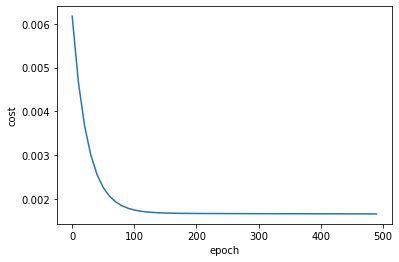

In [58]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [64]:
def predict (area,bedroom,w,b):
    scaled_x = sx.transform([[area,bedroom]])[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(1500,2,w,b)

D:\software\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


50.456774993544855

In [65]:
import random


In [70]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.99996786, 0.99992041]), -0.0009978854284799677, 0.004511585509756886)

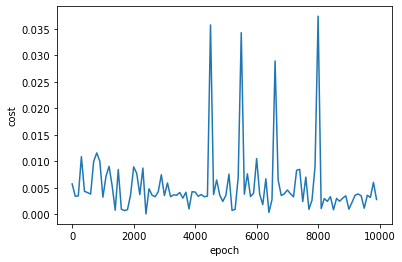

In [71]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [73]:
predict(1500,2,w_sgd,b_sgd)

D:\software\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


287.0742046425885